# July 2023 Cu-i Calcium

dTHF + LiBF4 + EtOH



In [1]:
import sys
import os
import json
sys.path.append(os.path.expanduser('~/git/analysis_playground/bayesian-fitting'))
sys.path.append(os.path.expanduser('~/git/nh3-analysis'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

import importlib
try:
    from bumps import dream
    import fit_uncertainties
    importlib.reload(fit_uncertainties)
    HAS_BUMPS  = True
except:
    print("No bumps")
    HAS_BUMPS = False

import summary_plots

In [28]:
project_dir = os.path.expanduser('~/git/nh3-analysis/july2023/')
data_dir = os.path.expanduser('/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-i')

#dyn_model_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting'))
dyn_model_dir = os.path.expanduser('~/reflectivity_fits/IPTS-30384')

#results_dir = os.path.expanduser(os.path.join(project_dir, 'dyn-fitting', 'results'))


# Auto-reduction directory
ar_dir = '/SNS/REF_L/IPTS-30384/shared/autoreduce/'

# Directory with fit results
fit_dir = os.path.expanduser('~/reflectivity_fits/IPTS-30384')

dynamic_run = 207326 # Cycle 1
dynamic_run = 207342 # Cycle 1

dyn_data_dir = '/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-i/30s'
dyn_fit_dir = '/SNS/users/m2d/git/nh3-analysis/july2023/dyn-fitting/207326-dyn/results-5s-bck'


## Summary of 60 Hz data

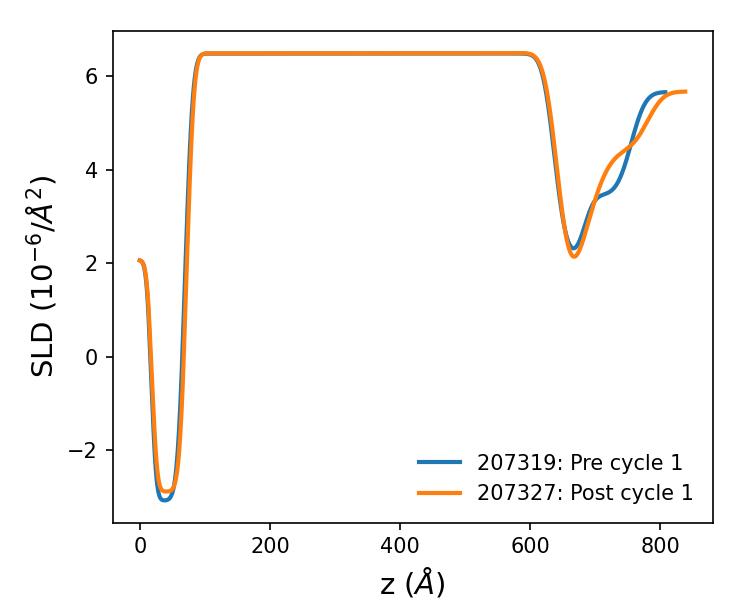

In [3]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(207319, "207319: Pre cycle 1", fit_dir=fit_dir, show_cl=False)
summary_plots.plot_sld(207327, "207327: Post cycle 1", fit_dir=fit_dir, show_cl=False)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()


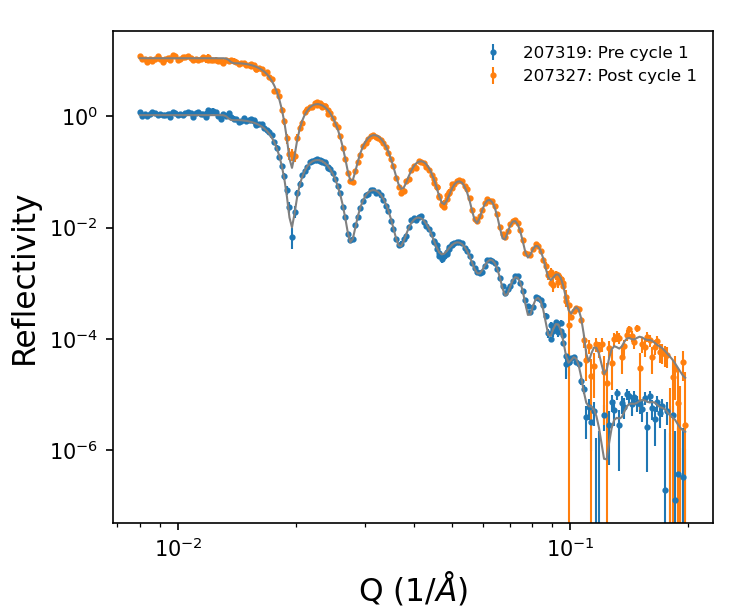

In [4]:
importlib.reload(summary_plots)

fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

multiplier = 10
scale = 1
summary_plots.plot_fit(207319, '207319: Pre cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier
summary_plots.plot_fit(207327, '207327: Post cycle 1', fit_dir=fit_dir, ar_dir=ar_dir, scale=scale)
scale *= multiplier

plt.legend(frameon=False, prop={'size': 8})
plt.xlabel('Q ($1/\AA$)', fontsize=15)
plt.ylabel('Reflectivity', fontsize=15)
plt.yscale('log')
plt.xscale('log')


/SNS/REF_L/IPTS-30384/shared/dynamic/Cu-i/30s
137
Ref r207342_t000000.txt
Skipped: 1


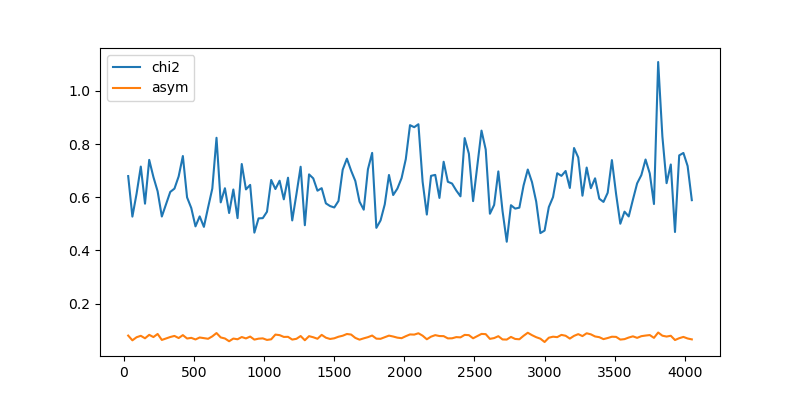

In [67]:
### importlib.reload(summary_plots)
#dyn_data_dir = '/SNS/REF_L/IPTS-29196/shared/dynamic/Cu-B-Expt-6/5s'
print(dyn_data_dir)
chi2 = summary_plots.detect_changes(dynamic_run, dyn_data_dir, first=0, last=-1, out_array=None)

207342
137


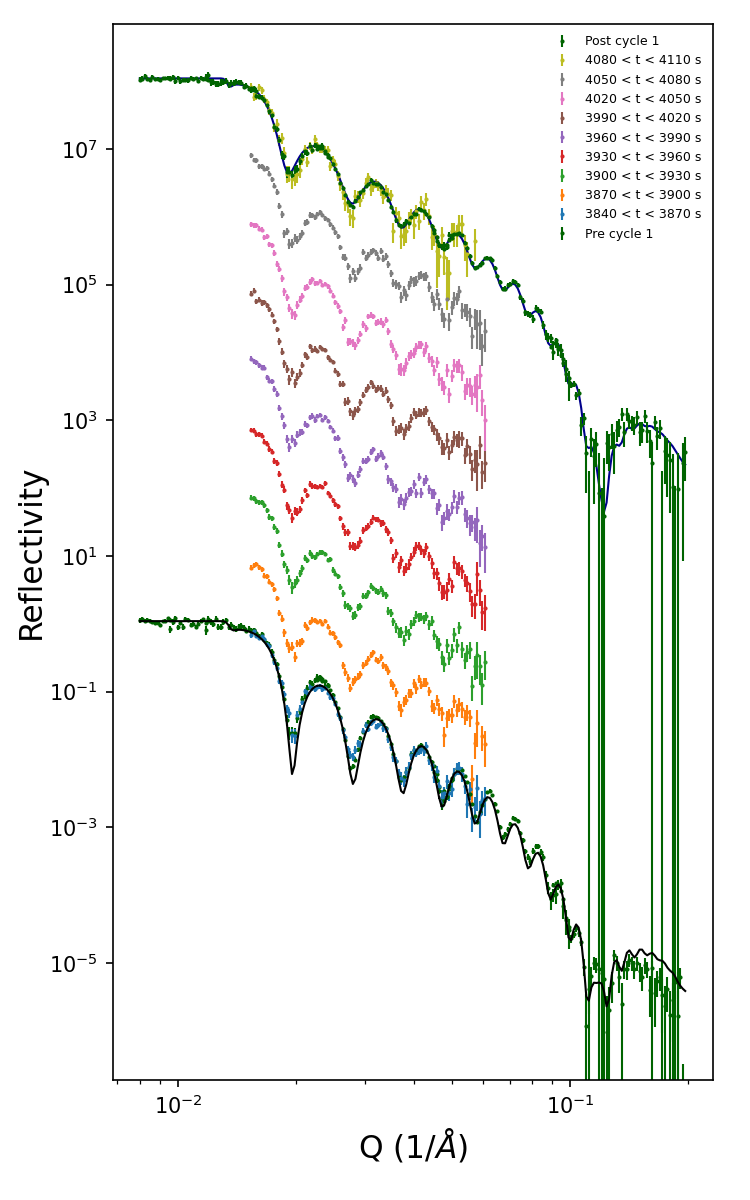

In [89]:
importlib.reload(summary_plots)
print(dynamic_run)
#file_list = summary_plots.plot_dyn_data(dynamic_run, 207319, 207327, first_index=445, last_index=475, delta_t=5, model_name='model-loop-207326',
#                                        fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)
file_list = summary_plots.plot_dyn_data(dynamic_run, 207335, 207343, first_index=128, last_index=154, delta_t=30, model_name='model-loop-207326',
                                        fit_dir=fit_dir, ar_dir=ar_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir)

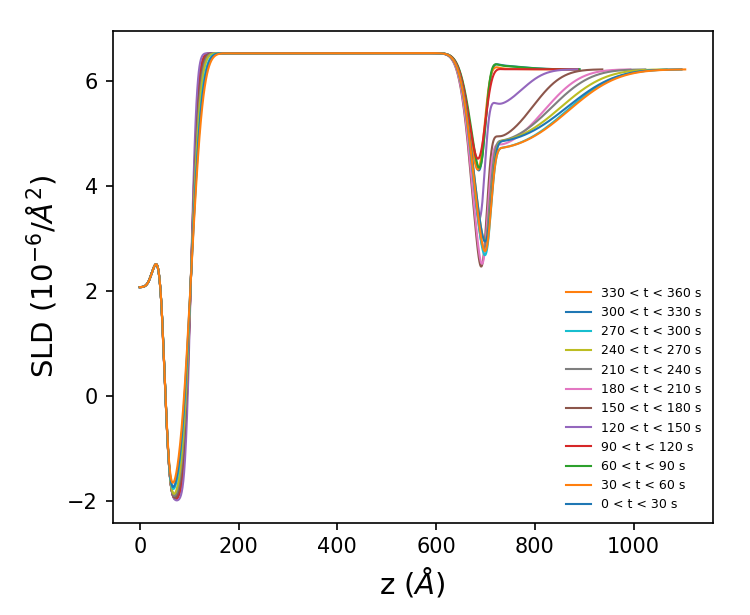

In [286]:
# Plot manual fits
importlib.reload(summary_plots)

summary_plots.plot_dyn_sld(file_list, None, None, 
                           fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, delta_t=30, 
                           show_cl=False, model_file=os.path.join(project_dir, 'model-207275.py'), model_name='model-loop-207275')

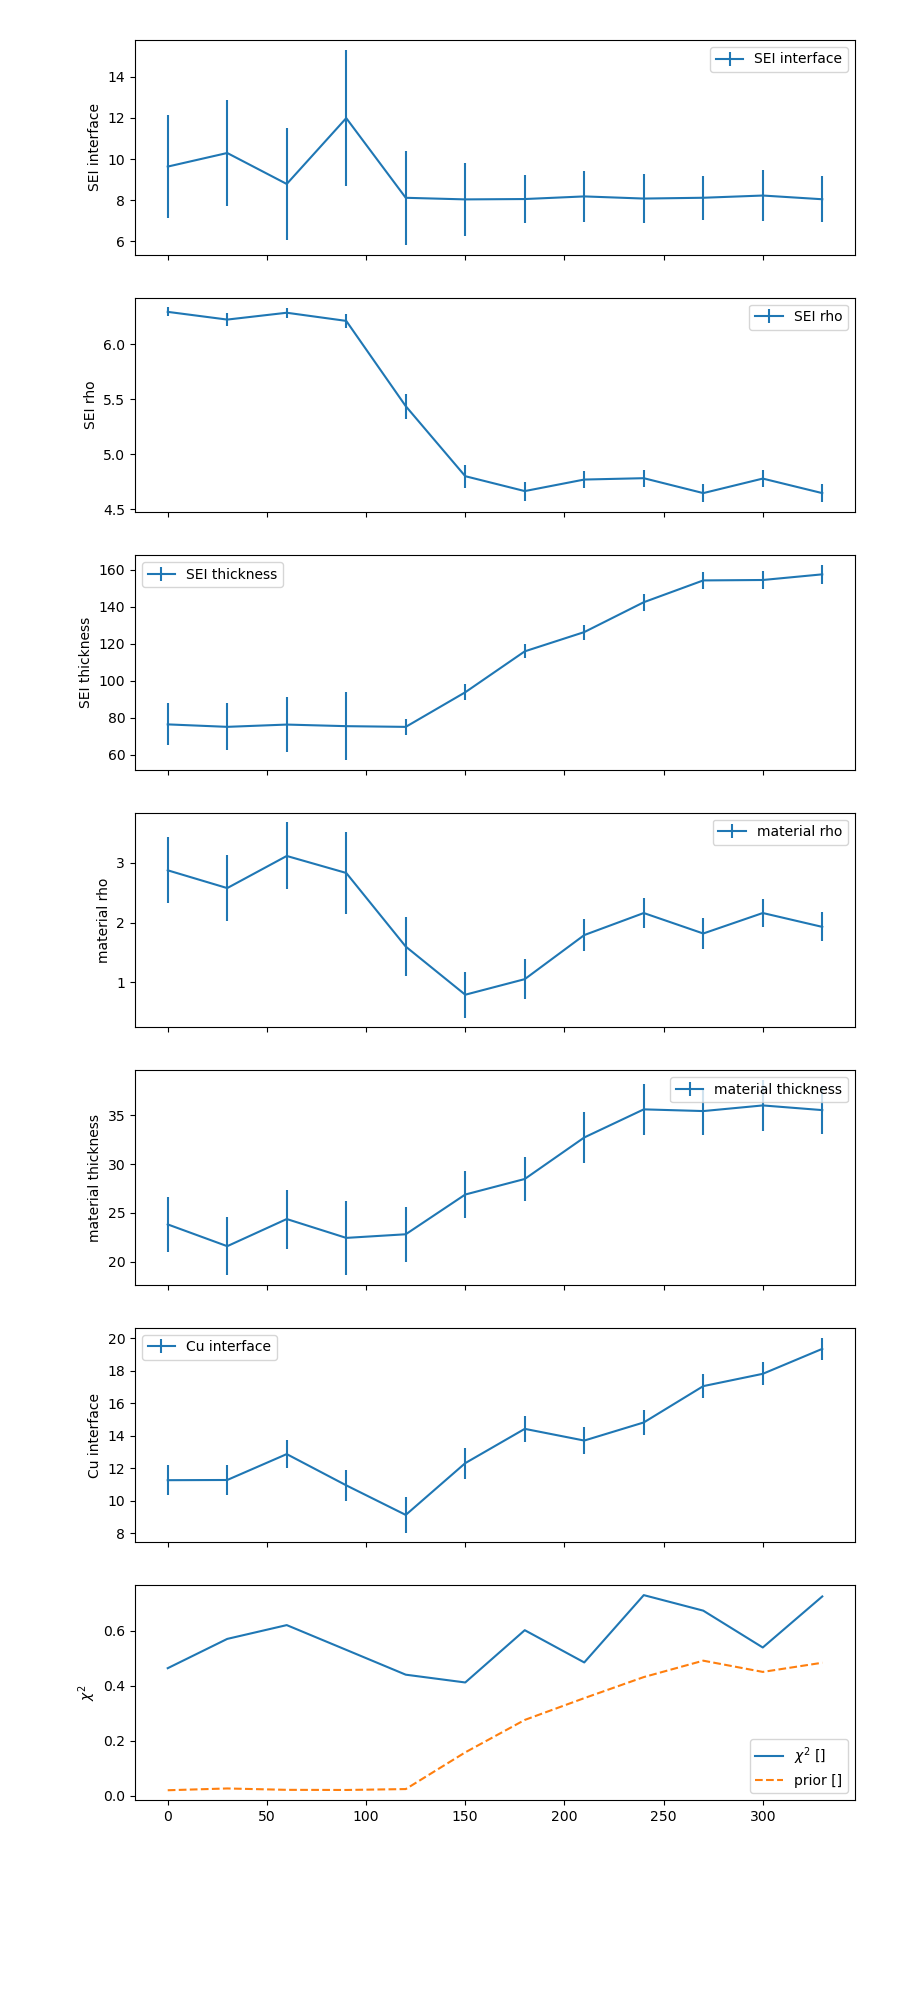

In [287]:
importlib.reload(summary_plots)

summary_plots.trend_data(file_list, None, 207282, 
                         fit_dir=fit_dir, dyn_data_dir=dyn_data_dir, dyn_fit_dir=dyn_fit_dir, 
                         model_name='model-loop-207275', model_file=None, add_plot=0)


Processing: /SNS/users/m2d/reflectivity_fits/IPTS-30384/207296/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-30384/207296/__model.py
Z offset = -171.3;    Z_max = 1033.4
Too many points: pruning down
MC file read: 0.004263877868652344 sec
Done 1.3573417663574219 sec
Processing: /SNS/users/m2d/reflectivity_fits/IPTS-30384/207177/__model.py
Read in /SNS/users/m2d/reflectivity_fits/IPTS-30384/207177/__model.py
Z offset = -215.745;    Z_max = 1085.2
Too many points: pruning down
MC file read: 0.0036890506744384766 sec
Done 1.2724332809448242 sec


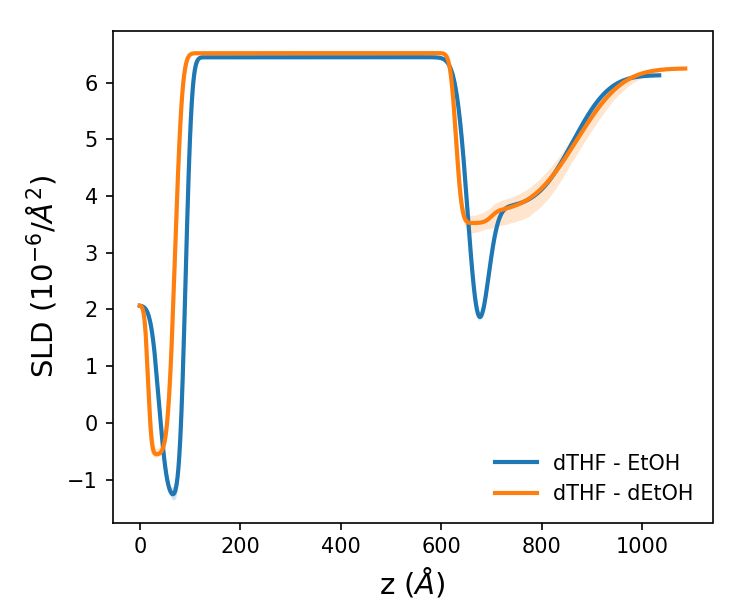

In [290]:
importlib.reload(summary_plots)
    
fig, ax = plt.subplots(dpi=150, figsize=(5, 4.1))
plt.subplots_adjust(left=0.15, right=.95, top=0.95, bottom=0.15)

summary_plots.plot_sld(207296, "dTHF - EtOH", fit_dir=fit_dir, show_cl=True)
summary_plots.plot_sld(207177, "dTHF - dEtOH", fit_dir=fit_dir, show_cl=True)

plt.legend(loc='lower right', frameon=False, fontsize=10)
plt.xlabel('z ($\AA$)', fontsize=14)
plt.ylabel('SLD ($10^{-6}/\AA^2$)', fontsize=14)
plt.show()